# Lab 4.1

## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the customer_value_analysis.csv into the variable customer_df

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

## 3. First look at its main features (head, shape, info).

In [3]:
print(customer_df.shape)
pd.set_option('display.max_columns', 24)
customer_df.head()

(9134, 24)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

## 4. Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).

In [5]:
def std_col_names(data):
    '''function to standardize column_names'''  
    
    import re
    data_c = data.copy()
    
    #changing header names
    cols = []
    #lowering cases and replacing space with underscore
    for i in data_c.columns: cols.append(re.sub('([a-z])([A-Z])', r'\1_\2', i).replace(' ','_').lower())
    data_c.columns = cols 
    
    return data_c

customer_df = std_col_names(customer_df)

## 5. Change effective to date column to datetime format.

In [6]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format = '%m/%d/%y')

In [7]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

## 6. Check NaN values per column.

In [8]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

## 7. Define a functions that given an input dataframe, returns two dataframes: one with the numerical columns and another with categorical columns of the input dataframe.

In [9]:
def sep_num_cat(df):
    '''function that separates one dataframe into two: 
    one with numerical and another with categorical columns.
    When using this function, you have to store results in 2 variable'''
    n = df.select_dtypes(np.number)
    c = df.select_dtypes('object')
    return n,c

In [10]:
df_num,df_cat = sep_num_cat(customer_df)

In [11]:
print(customer_df.shape, df_num.shape, df_cat.shape)

(9134, 24) (9134, 8) (9134, 15)


effective to date is a datetime variable and cannot be handle by regression, as such, for now, will be left outside of numerical and categorical datasets

## 8. Drop any ID column.

In [12]:
df_cat = df_cat.drop(['customer'], axis =1)

In [13]:
df_cat.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## 9. Get the correlation matrix for the numerical variables. What is pair of numerical variables that have the highest correlation? It makes sense, why?

In [14]:
corr_m = df_num.corr()
corr_m

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


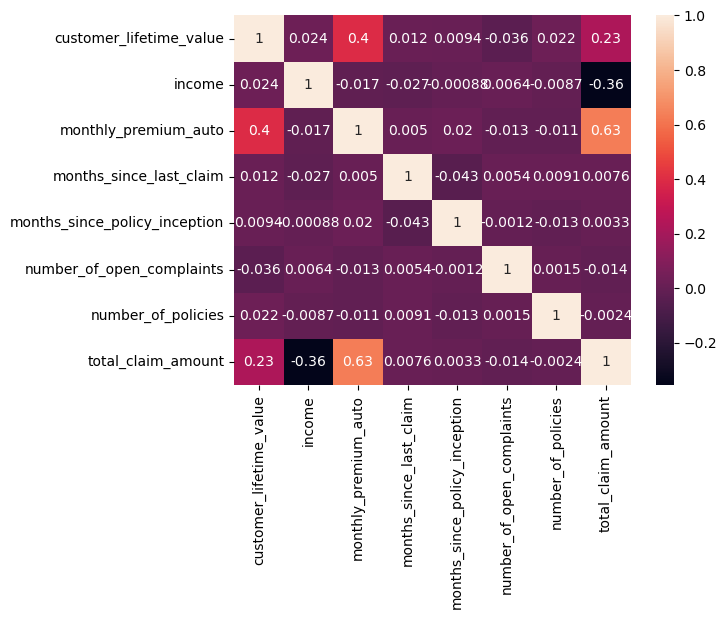

In [15]:
ax = sns.heatmap(corr_m, annot=True)

total_claim_amount : monthly_premium_auto
higher the monthly premium auto, higher the total claim amount. It makes sense.

## 10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. 

To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [16]:
def sep_dis_con(df, c=36):
    '''function that separates one dataframe into two: 
    one with numerical and another with categorical columns.
    When using this function, you have to store results in 2 variable'''
    con = []
    dis = []
    for col in df:
        if len(df[col].unique()) > c:
            con.append(df[col])
        else:
            dis.append(df[col])
    con = pd.DataFrame(con).T
    dis = pd.DataFrame(dis).T    
    return con, dis

In [17]:
c, d = sep_dis_con(df_num)

In [18]:
print(c.shape, d.shape)

(9134, 5) (9134, 3)


## 11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

In [19]:
def plot_barplot(df):
    '''Function to plot barplots for discrete dataframe:
    1 column, n rows (number of columns of dataframe) '''
    
    col_names = list(df.select_dtypes(np.number))
    plt_size = len(col_names) #define rows in subplot
    n = 0 #counter to attribute position for plot
    
    fig, ax = plt.subplots(plt_size,1, figsize=(16,16))
    n = 0
    for i in col_names:
        sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), ax = ax[n])
        ax[n].set(xlabel = i, ylabel='Count')
        n += 1
    plt.show()

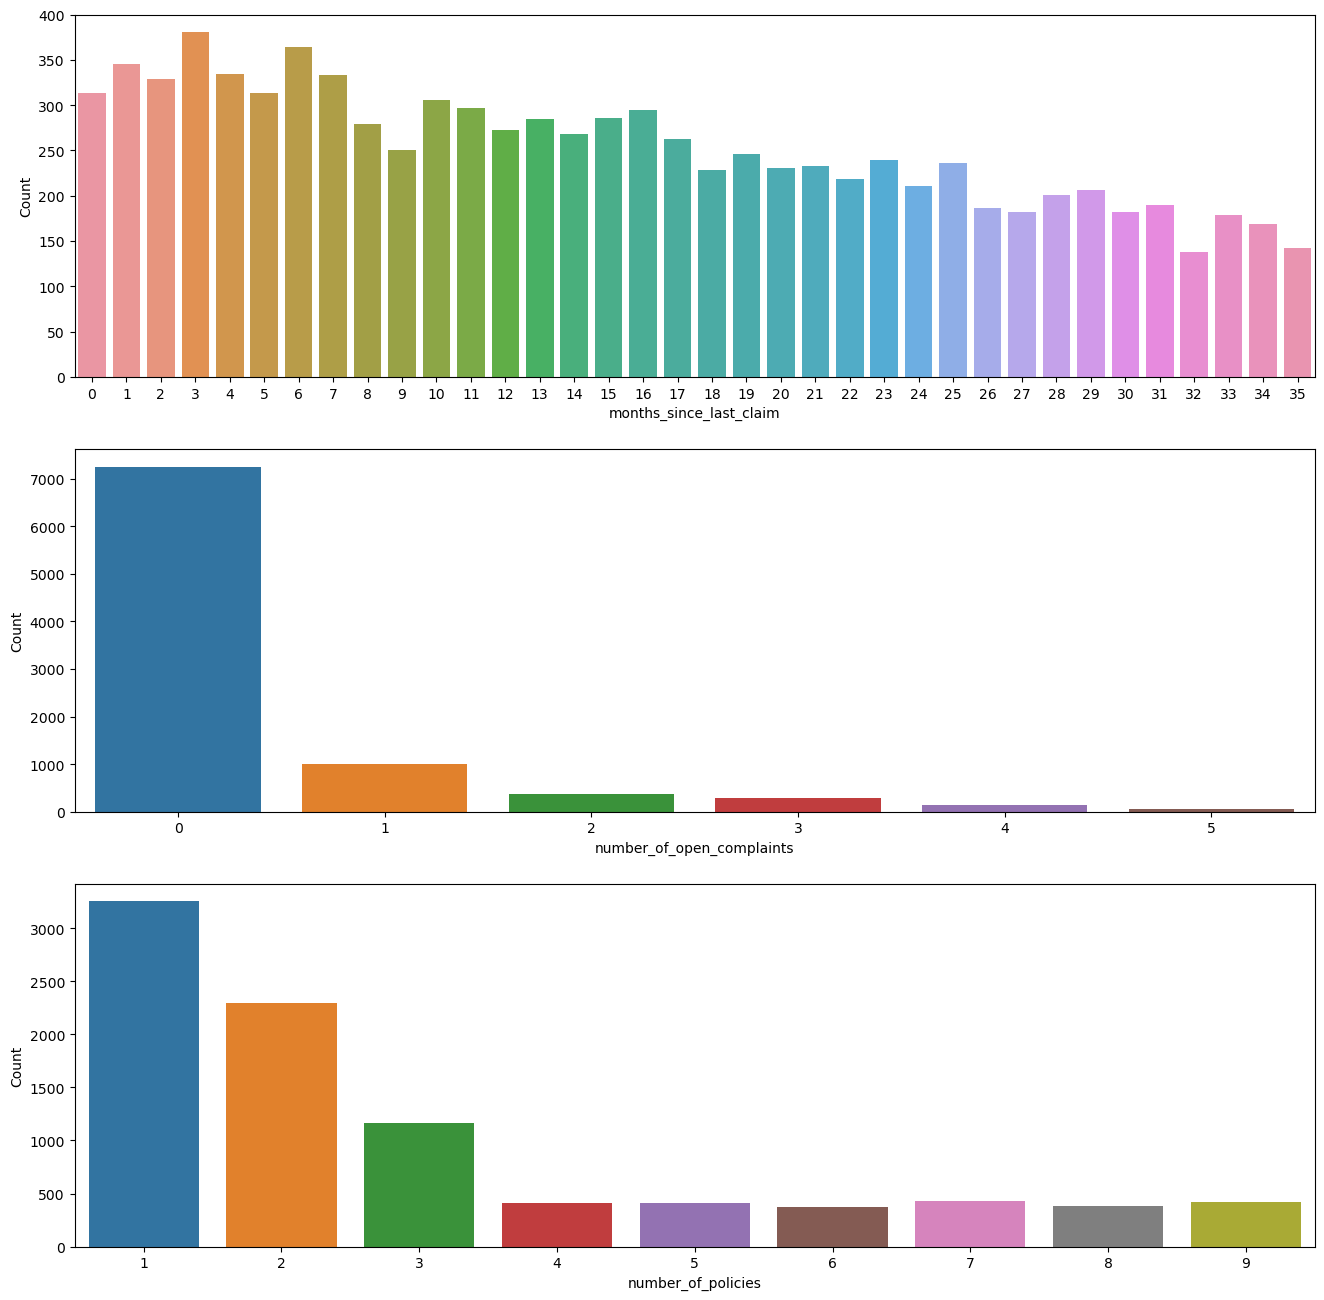

In [20]:
plot_barplot(d)

## 12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

def plot_histogram(df):
    
    import itertools
    
    col_names = list(df.select_dtypes(np.number))
    
    a = [0, 1, 2]
    c = list(itertools.permutations(a, 2)) #combinations generator for plot positions
    n = 0 #counter to attribute position for plot
    
    fig, ax = plt.subplots(3,3, figsize=(16,16))
    
    for i in col_names:
        sns.histplot(data = df[i], ax = ax[c[n]])
        n += 1
    plt.show()
    
As, in this, case, there are 5 continuous, numerical columns, there is no need to plot on a 2D subplot

In [21]:
def plot_histogram(df):
    '''Function to plot histograms for dataframe:
    1 column, n rows (number of columns of dataframe) '''
    
    col_names = list(df.select_dtypes(np.number))
    plt_size = len(col_names)  #define rows in subplot
    n = 0 #counter to attribute position for plot
    
    fig, ax = plt.subplots(plt_size,1, figsize=(16,16))
    
    for i in col_names:
        sns.histplot(data = df[i], ax = ax[n])
        n += 1
    plt.show()

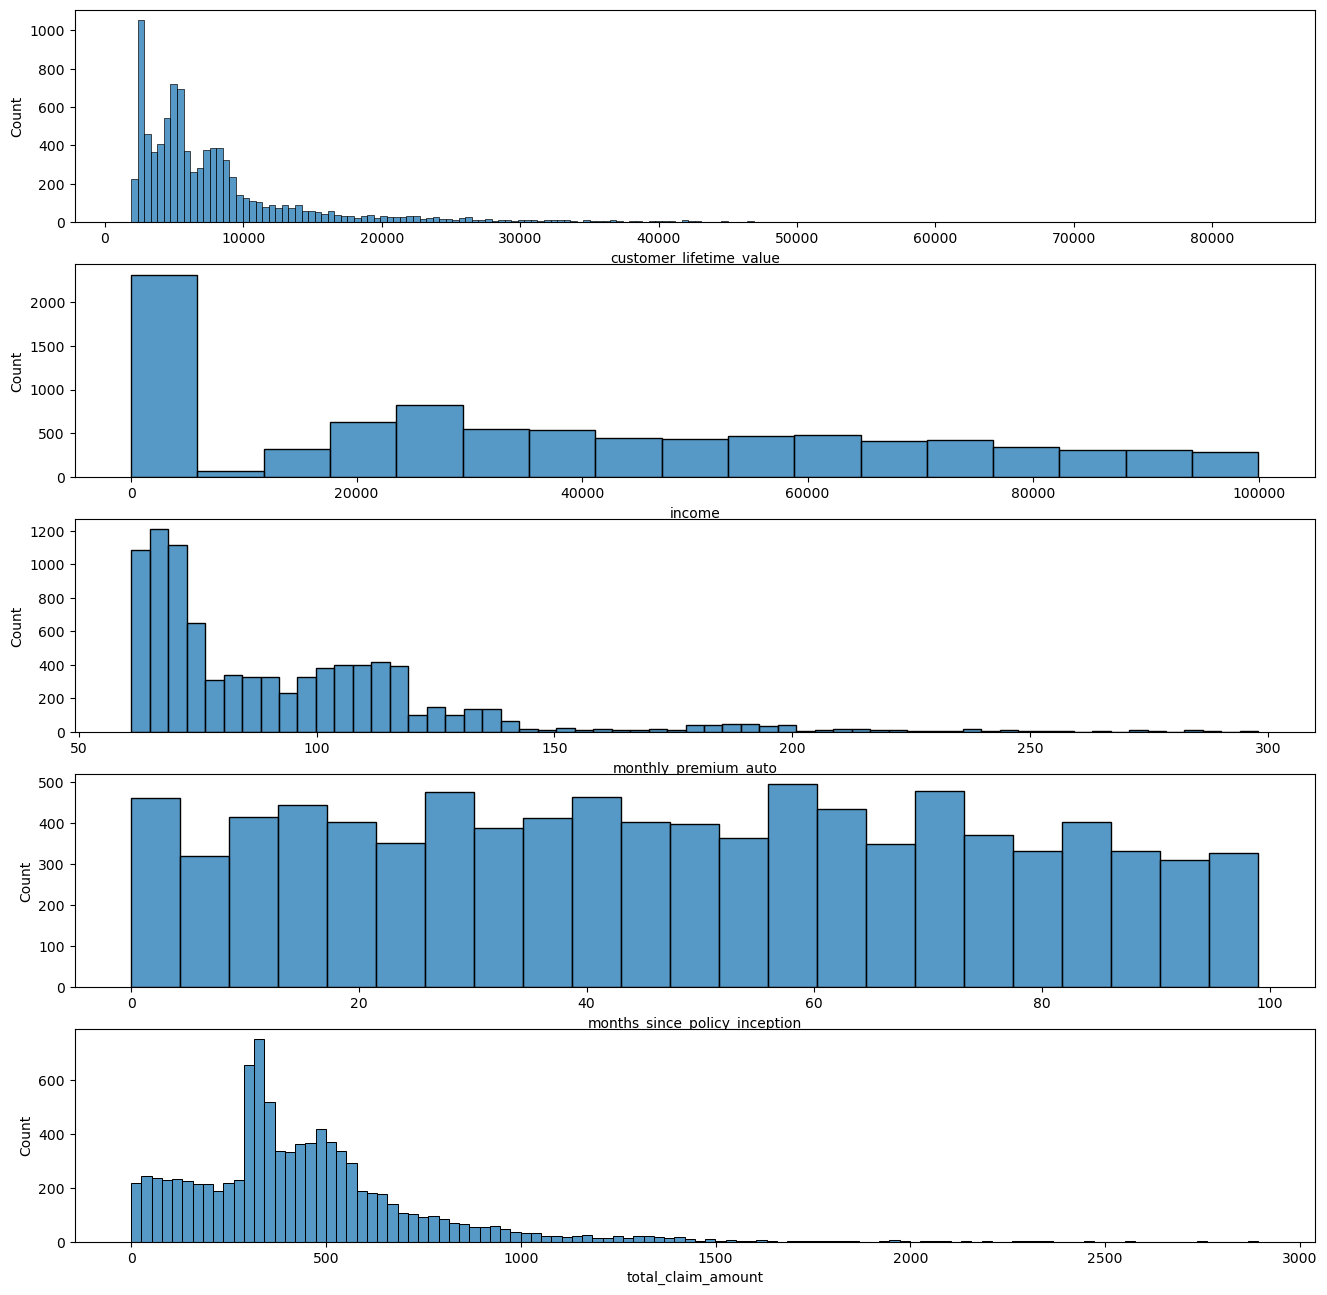

In [22]:
plot_histogram(c)

## 13. According to the previous histogram plots, do you think that you do will have to apply any transformation?

yes, there is skewed distribution

## 14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plots for the continuous_df.

In [23]:
def plot_boxplot(df):
    '''Function to plot boxplots for dataframe:
    1 column, n rows (number of columns of dataframe) '''
        
    col_names = list(df.select_dtypes(np.number))
    plt_size = len(col_names)  #define rows in subplot
    n = 0 #counter to attribute position for plot
    
    fig, ax = plt.subplots(plt_size,1, figsize=(16,16))
    
    for i in col_names:
        sns.boxplot(data = df[i], orient = 'h', ax = ax[n])
        n += 1
    plt.show()

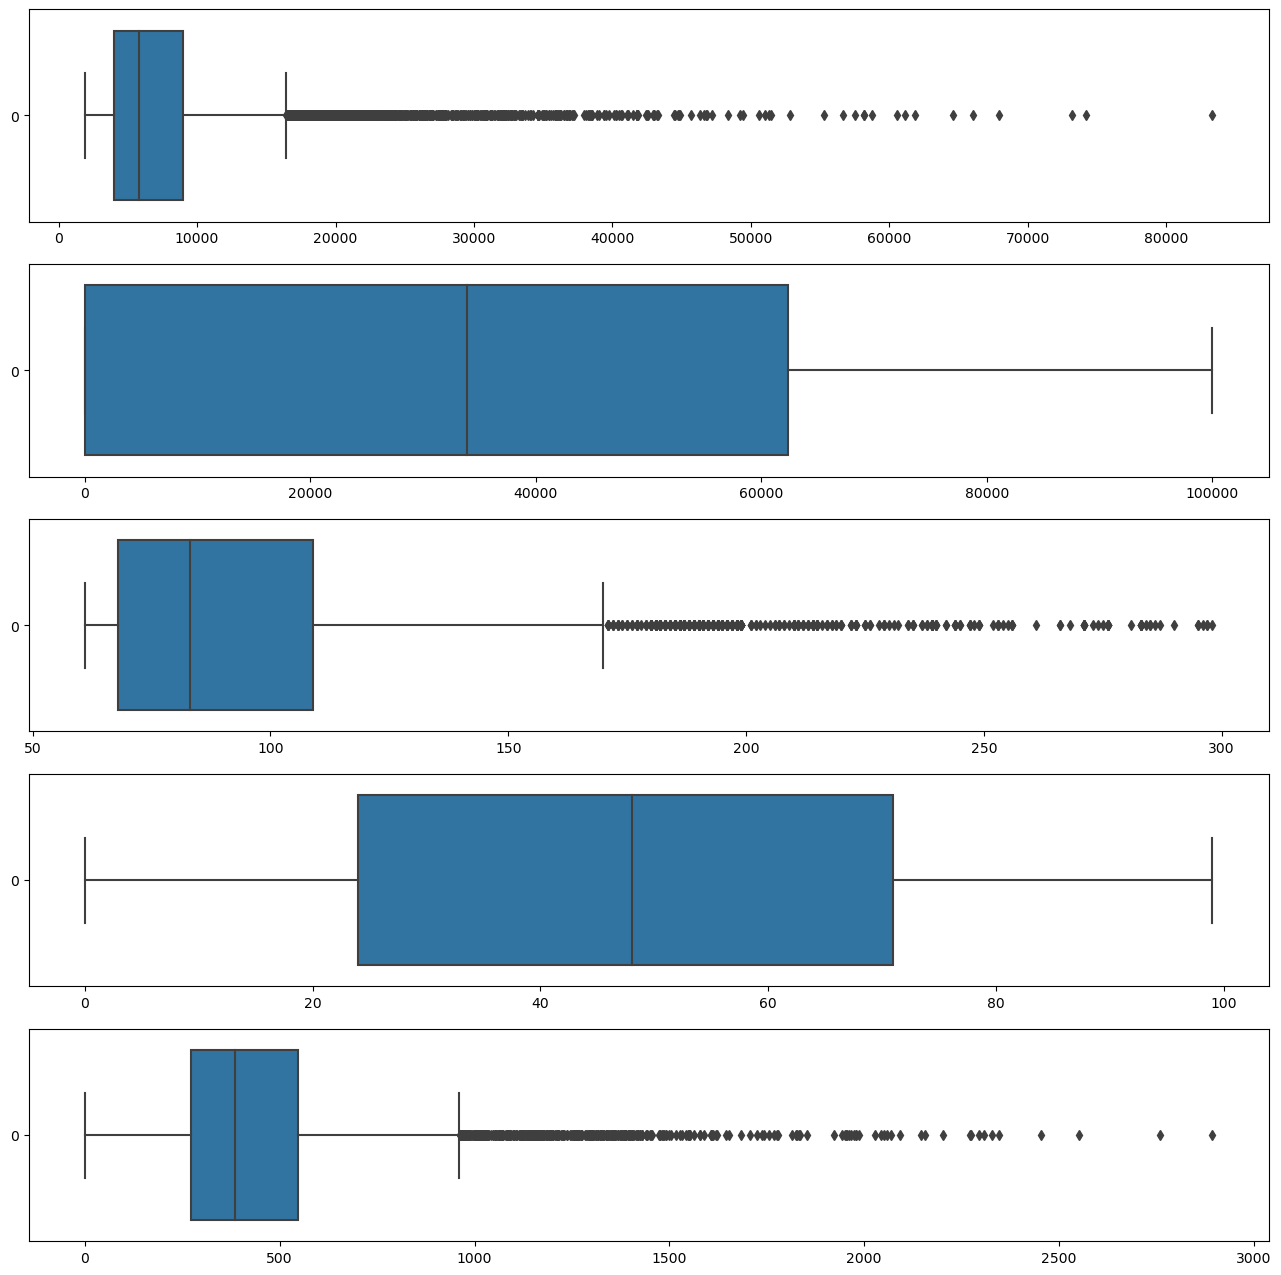

In [24]:
plot_boxplot(c)